In [1]:
"""
pandas怎样实现 groupby 分组统计
类似SQL
select city, max(temperature) from city_weather groupby city;

groupby:先对数据分组，然后在每个分组上应用聚合函数、转换函数。

本例演示：
1. 分组使用聚合函数作数据统计
2. 遍历groupby的结果理解执行流程
3. 实例分组探测天气数据
"""

import pandas as pd
import numpy as np

# # 加上下面这一句，能在jupyter notebook展示matplot图表
%matplotlib inline

df = pd.DataFrame(
    {
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.235928,-0.443198
1,bar,one,-0.334591,0.589356
2,foo,two,-0.420528,0.298274
3,bar,three,-1.260328,-1.387961
4,foo,two,0.041817,0.541156
5,bar,two,-1.437063,1.007786
6,foo,one,0.476305,-1.302894
7,bar,three,-1.138679,1.239986


In [2]:
# 1. 分组使用聚合函数作数据统计
# 1.1 单个列groupby，查询所有数据列的统计
# 我们可以看到，groupby的‘A’变成了数据的索引列
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwothree,-4.170661,1.449167
foo,onetwotwoone,1.333521,-0.906662


In [3]:
# 1.2 多个列groupby 查询所有数据列的统计
# 我们看到 A和B成对变成了二级索引
df.groupby(['A', 'B'], as_index=False).mean()

,A,B,C,D
0,bar,one,-0.334591,0.589356
1,bar,three,-1.199504,-0.073988
2,bar,two,-1.437063,1.007786
3,foo,one,0.856116,-0.873046
4,foo,two,-0.189356,0.419715


In [9]:
# 同时查看多种数据统计
# TODO: 此处有问题

df.groupby('A').agg(['sum'])

,B,C,D
,sum,sum,sum
A,,,
bar,onethreetwothree,-4.170661,1.449167
foo,onetwotwoone,1.333521,-0.906662


In [14]:
df.groupby('A').agg('mean', 'std')

,C,D
A,,
bar,-1.042665,0.362292
foo,0.333380,-0.226666


In [21]:
# 查看单列的结果数据统计 方法1
df.groupby('A').agg(['sum'])

,B,C,D
,sum,sum,sum
A,,,
bar,onethreetwothree,-4.170661,1.449167
foo,onetwotwoone,1.333521,-0.906662


In [22]:
# 查看单列的结果数据统计 方法2
df.groupby('A').agg('sum')['C']

A
bar   -4.170661
foo    1.333521
Name: C, dtype: float64

In [23]:
# 不同列使用不同聚合函数

df.groupby('A').agg({'C': 'sum', 'D': 'mean'})

,C,D
A,,
bar,-4.170661,0.362292
foo,1.333521,-0.226666


In [24]:
# 遍历group的结果理解执行流程
g = df.groupby('A')
g

In [27]:
for name, group in g:
    print(name)
    print(group)
    print()

bar
     A      B         C         D
1  bar    one -0.334591  0.589356
3  bar  three -1.260328 -1.387961
5  bar    two -1.437063  1.007786
7  bar  three -1.138679  1.239986

foo
     A    B         C         D
0  foo  one  1.235928 -0.443198
2  foo  two -0.420528  0.298274
4  foo  two  0.041817  0.541156
6  foo  one  0.476305 -1.302894



In [28]:
# 获取单个分组的数据
g.get_group('bar')

,A,B,C,D
1,bar,one,-0.334591,0.589356
3,bar,three,-1.260328,-1.387961
5,bar,two,-1.437063,1.007786
7,bar,three,-1.138679,1.239986


In [29]:
# 遍历多个列聚合的分组
g = df.groupby(['A', 'B'])
for name, group in g:
    print(name)
    print(group)
    print()

('bar', 'one')
     A    B         C         D
1  bar  one -0.334591  0.589356

('bar', 'three')
     A      B         C         D
3  bar  three -1.260328 -1.387961
7  bar  three -1.138679  1.239986

('bar', 'two')
     A    B         C         D
5  bar  two -1.437063  1.007786

('foo', 'one')
     A    B         C         D
0  foo  one  1.235928 -0.443198
6  foo  one  0.476305 -1.302894

('foo', 'two')
     A    B         C         D
2  foo  two -0.420528  0.298274
4  foo  two  0.041817  0.541156



In [33]:
g.get_group(('foo', 'one'))

,A,B,C,D
0,foo,one,1.235928,-0.443198
6,foo,one,0.476305,-1.302894


In [34]:
# 可以查询groupb后的几列，生成个series或者DataFrame
g['C']

In [36]:
for name, group in g['C']:
    print(name)
    print(group)
    print()

('bar', 'one')
1   -0.334591
Name: C, dtype: float64

('bar', 'three')
3   -1.260328
7   -1.138679
Name: C, dtype: float64

('bar', 'two')
5   -1.437063
Name: C, dtype: float64

('foo', 'one')
0    1.235928
6    0.476305
Name: C, dtype: float64

('foo', 'two')
2   -0.420528
4    0.041817
Name: C, dtype: float64



# 实例分组探索天气数据

In [46]:
file_path = './data/beijing_tianqi/beijing_tianqi_2018.csv'
df = pd.read_csv(file_path)

df.loc[:, 'bWendu'] = df['bWendu'].str.replace('℃', '').astype('int32')
df.loc[:, 'yWendu'] = df['yWendu'].str.replace('℃', '').astype('int32')

In [47]:
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1
...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1


In [51]:
# 新增一列为月份

df['month'] = df['ymd'].str[:7]
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,2018-01
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,2018-01
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,2018-01
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,2018-01
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,2018-01


In [54]:
# 查看每月最高温度
data = df.groupby('month')['bWendu'].max()
data

month
2018-01     7
2018-02    12
2018-03    27
2018-04    30
2018-05    35
2018-06    38
2018-07    37
2018-08    36
2018-09    31
2018-10    25
2018-11    18
2018-12    10
Name: bWendu, dtype: object

<Axes: xlabel='month'>

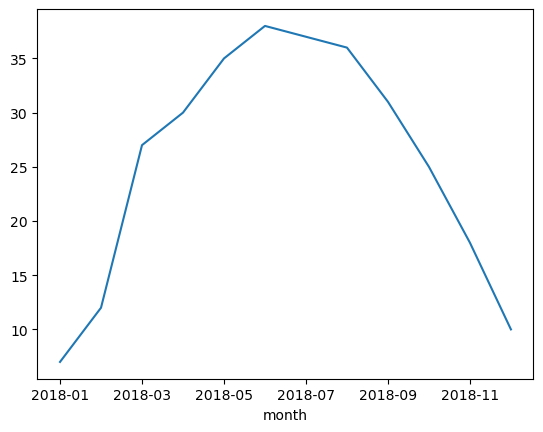

In [55]:
data.plot()

In [56]:
groupdata = df.groupby('month').agg({'bWendu': 'max', 'yWendu': 'min', 'aqi': 'mean'})
groupdata

,bWendu,yWendu,aqi
month,,,
2018-01,7,-12,60.677419
2018-02,12,-10,78.857143
2018-03,27,-4,130.322581
2018-04,30,1,102.866667
2018-05,35,10,99.064516
2018-06,38,17,82.300000
2018-07,37,22,72.677419
2018-08,36,20,59.516129
2018-09,31,11,50.433333


<Axes: xlabel='month'>

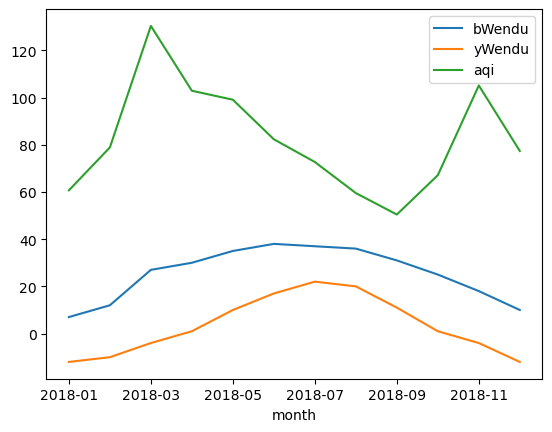

In [57]:
groupdata.plot()